# Análise Exploratória de Dados (R)

## Bibliotecas importadas

In [57]:
library(ggplot2)
library(matrixStats)

## Análise da população e taxas de homicídio

### Descrição do conjunto de dados

O conjunto de dado (_dataset_) analisado neste _notebook_ contém os dados populacionais de de taxa de assassinato (em unidades por 100.000 pessoas por ano) para cada um do 50 estados americanos, de acordo com o Censo 2010 desse país.

## Carregamento dos dados e primeiras visualizações

In [3]:
state <- read.csv('../data/state.csv')

As primeiras cinco linhas do _dataset_ são as seguintes:

In [4]:
head(state)

,State,Population,Murder.Rate,Abbreviation
,<chr>,<int>,<dbl>,<chr>
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO


Dimensões do _dataset_:

In [6]:
dim(state)

[1] 50  4

## Análise Exploratória de Dados

### Medidas de posição

A populaçãp média por estado nos EUA em 2010 foi de:

In [8]:
mean(state[['Population']])

[1] 6162876

Por sua vez, a mediana da da população é: 

In [10]:
median(state[['Population']])

[1] 4436370

O fato de que a média é maior que a mediana é um indicativo da existência de estados cuja população é muito maior que os demais (valores extremos). Uma forma de contornar esse "problema" é retirar do cálculo da média alguns desses valores extremos. Isso pode ser feito por meio de uma média aparada.

Em **R**, isso pode ser feito por meio do uso de argumento `trim` da função `mean` utilizada acima. Por exemplo, retirando 10% dos dados em cada extremidade, tem-se:

In [12]:
mean(state[['Population']], trim=0.1)

[1] 4783697

Quanto à taxa de assassinatos, uma informação importante é a taxa de assassinato nacional. Para esse cálculo da taxa de assassinato ponderada pela população, pode-se utilizar a função `weighted.mean` ou a função `weighted.median`, ambas do pacote **R** `matrixStats`: 

**Média Ponderada:**

In [14]:
weighted.mean(state[['Murder.Rate']], w = state[['Population']])

[1] 4.445834

**Mediana Ponderada:**

In [18]:
weightedMedian(state[['Murder.Rate']], w = state[['Population']])

[1] 4.4

### Medidas de Dispersão

**Desvio Padrão:**

In [19]:
sd(state[['Population']])

[1] 6848235

**Intervalo Interquartil ($IQR$):**

In [20]:
IQR(state[['Population']])

[1] 4847308

**Desvio Absoluto Mediano ($MAD$):**

In [21]:
mad(state[['Population']])

[1] 3849870

### Exploração da Distribuição

**Quantis** da distribuição de dados de taxa de assassinato:

In [22]:
quantile(state$Murder.Rate, p = c(0.05, 0.25, 0.5, 0.75, 0.95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

Em especial, os quantis representativos de 25%, 50% e 75% são denominados **quartis** e o quartil 50% é a própria mediana da distribuição. 

Visualização gráfica dos **quartis** em um gráfico de tipo _boxplot_:

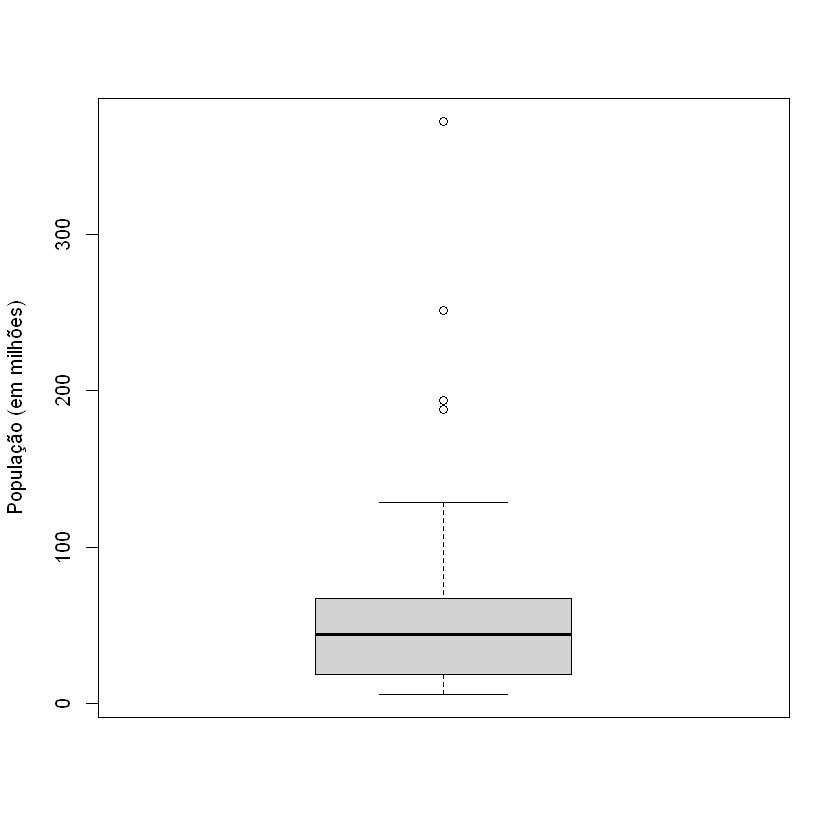

In [23]:
boxplot(state$Population / 100000,
        ylab = "População (em milhões)")

### Tabelas de Frequência e Histogramas

In [44]:
pop.mi <- state$Population / 100000
breaks <- seq(from = min(pop.mi), 
              to = max(pop.mi),
              length = 11)

pop_freq <- cut(pop.mi, breaks = breaks, right = TRUE, include.lowest = TRUE)

data.frame(table(pop_freq))

pop_freq,Freq
<fct>,<int>
"[5.64,42.3]",24
"(42.3,79]",14
"(79,116]",6
"(116,152]",2
"(152,189]",1
"(189,226]",1
"(226,262]",1
"(262,299]",0
"(299,336]",0


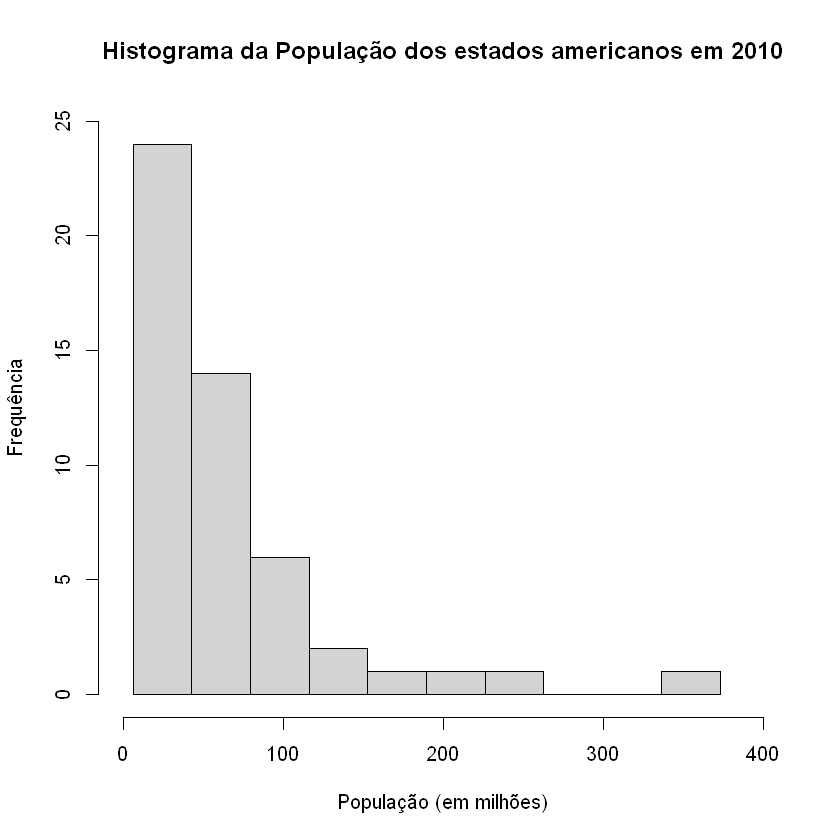

In [46]:
hist(pop.mi, 
     breaks = breaks, 
     main = "Histograma da População dos estados americanos em 2010", 
     xlab = "População (em milhões)", ylab = "Frequência", 
     xlim = c(0, 400), ylim = c(0, 25))

### Gráficos de densidade e estimativas

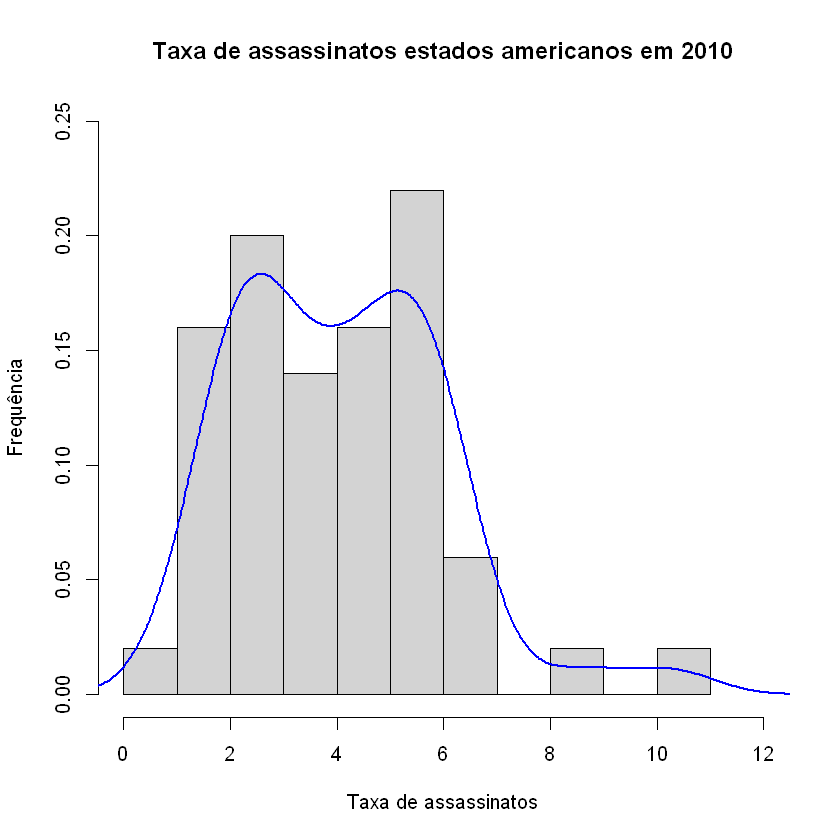

In [56]:
hist(state[['Murder.Rate']], 
     freq = FALSE,
     main = "Taxa de assassinatos estados americanos em 2010", 
     xlab = "Taxa de assassinatos", ylab = "Frequência",
     xlim = c(0, 12), ylim = c(0, .25))
lines(density(state[['Murder.Rate']]), lwd =  2, col = 'blue')

## Dados Binários e Dados Caategóricos

In [65]:
dfw <- read.csv('../data/dfw_airline.csv', sep = ',')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on '../data/dfw_airline.csv'"


In [66]:
head(dfw)

,Carrier,ATC,Weather,Security,Inbound
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,64263.16,84856.5,11235.42,343.15,118427.8


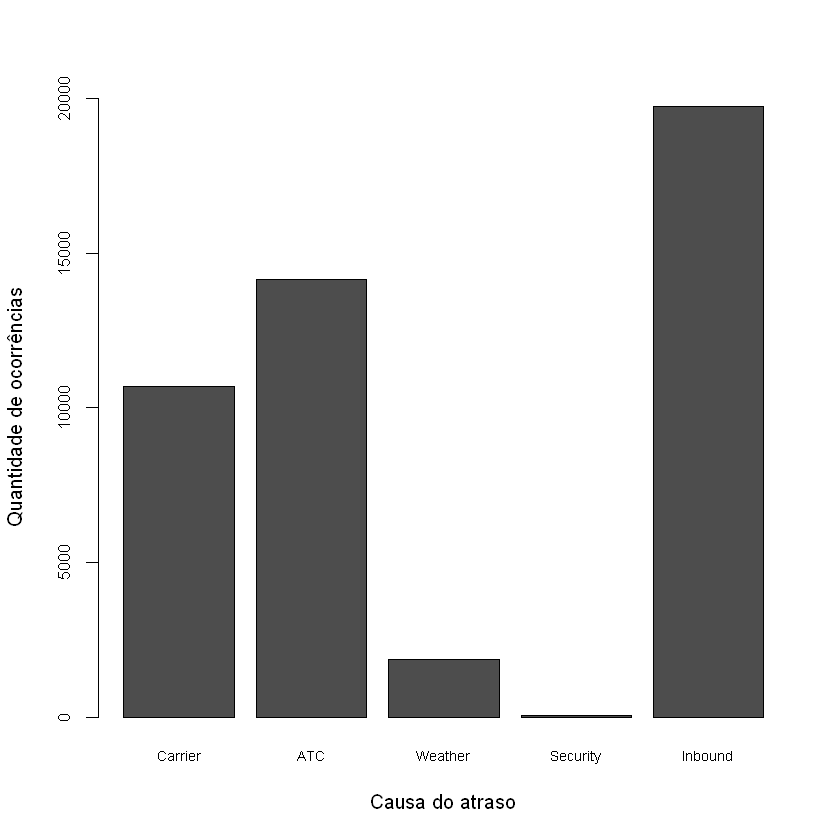

In [73]:
barplot(as.matrix(dfw) / 6, 
        cex.axis = 0.8, cex.names = 0.7, 
        xlab = 'Causa do atraso', 
        ylab = 'Quantidade de ocorrências', ylim = c(0, 20000))

### Correlação